CODIGOS PARA VERIFICAR A ATIVIDADE PRÁTICA DA SEMANA 2 DO CURSO DE FOTOGRAFIA COMPUTACIONAL.

In [ ]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (15/15), done.


# IMPORTS

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

# Restauração

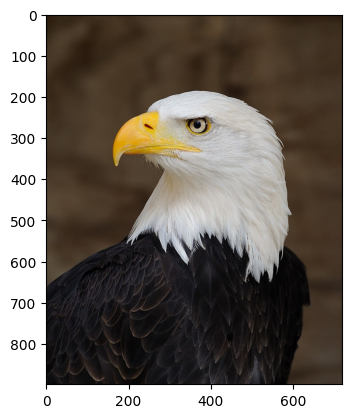

In [ ]:
image_path = "/content/image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg"
imagem_original = np.array(Image.open(image_path))
plt.imshow(imagem_original)
plt.show()

In [ ]:
def aplicar_filtro(imagem, filter):
  imagem_final = np.zeros(imagem.shape)
  for x in range(imagem[0].shape[0]-(filter[0].shape[0] - 1)):
      for y in range(imagem[0].shape[1]-(filter[0].shape[1] - 1)):
        imagem_final[0][x,y] = np.sum(imagem[0][x:x+filter[0].shape[0], y:y+filter[0].shape[1]] * filter[0])
        imagem_final[1][x,y] = np.sum(imagem[1][x:x+filter[1].shape[0], y:y+filter[1].shape[1]] * filter[1])
        imagem_final[2][x,y] = np.sum(imagem[2][x:x+filter[2].shape[0], y:y+filter[2].shape[1]] * filter[2])

  return normalizar(imagem_final)

normalizar = lambda v: (255*(v- v.min())/(v.max() - v.min())).astype(int)


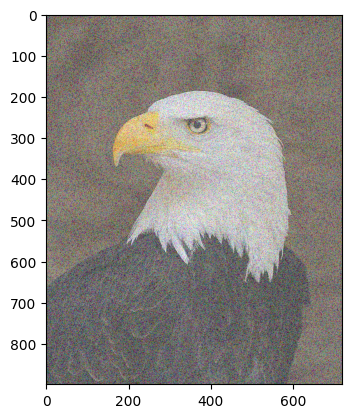

In [ ]:
ruido = np.round((np.random.random(size= imagem_original.shape) >.2) *200).astype(int)

imagem_ruido = normalizar(imagem_original + ruido)

plt.imshow(imagem_ruido)
plt.show()

(899, 719, 3)


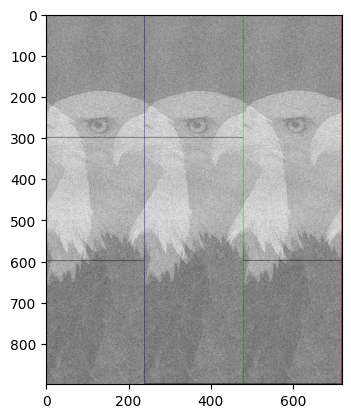

In [ ]:
filtro_media = np.ones((3,3,3))/27
print(imagem_ruido.shape)
imagem_media = aplicar_filtro(imagem_ruido.reshape((3, 899, 719)), filtro_media)

plt.imshow(imagem_media.reshape((899, 719, 3)))
plt.show()

In [ ]:
def aplicar_filtro_mediana(imagem, filter_shape):
  imagem_final = np.zeros(imagem.shape)
  for x in range(imagem[0].shape[0]-(filter_shape[0] - 1)):
      for y in range(imagem[0].shape[1]-(filter_shape[1] - 1)):
        imagem_final[0][x,y] = np.median(imagem[0][x:x+filter_shape[0], y:y+filter_shape[1]])
        imagem_final[1][x,y] = np.median(imagem[1][x:x+filter_shape[0], y:y+filter_shape[1]])
        imagem_final[2][x,y] = np.median(imagem[2][x:x+filter_shape[0], y:y+filter_shape[1]])

  return normalizar(imagem_final)

normalizar = lambda v: (255*(v- v.min())/(v.max() - v.min())).astype(int)


(899, 719, 3)


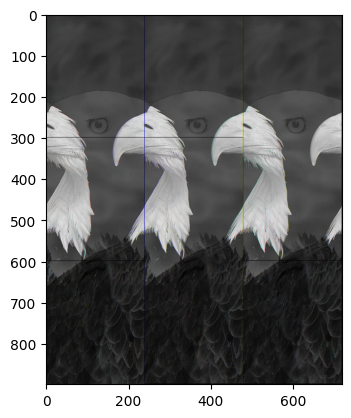

In [ ]:
print(imagem_ruido.shape)
imagem_media = aplicar_filtro_mediana(imagem_original.reshape((3, 899, 719)), (3,3))

plt.imshow(imagem_media.reshape((899, 719, 3)))
plt.show()

#

# imagens coloridas

In [ ]:
# Defina uma Cor de referencia
amarelo = (255,255,0)

# definimos a funcao de distancia entre cores
d_cores = lambda cor1, cor2: np.sqrt((cor1[0] - cor2[0])**2 + (cor1[1] - cor2[1])**2 + (cor1[2] - cor2[2])**2)

# definimos uma distancia de limiar (threshold)
# todo pixel com distancia superior ao limiar sera considerado 0,0,0
limiar = d_cores((0,0,0),(100,100,100)) # escolhi uma distancia maxima de uma esfera de raio 100


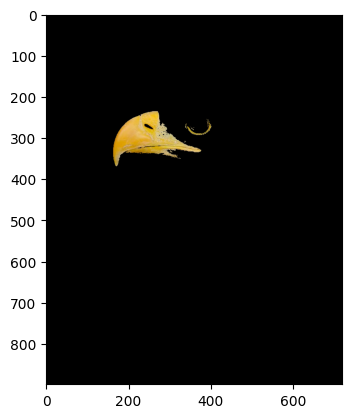

123.38045956921472


In [ ]:
img_bico = np.zeros_like(imagem_original)
list_dist_cores = []


# olhamos cada pixxel
for x in range(imagem_original.shape[0]):
  for y in range(imagem_original.shape[1]):
    # calculamos a distancia do pixel para a cor alvo
    dist_cores = d_cores(imagem_original[x][y], amarelo)
    # list_dist_cores.append(dist_cores)
    # colocamos o pixel na imagem final se a distancia dele para a cor alvo for inferior a cor de limiar
    if dist_cores < limiar:
      img_bico[x][y] = imagem_original[x][y]
      list_dist_cores.append(dist_cores)
    else:
      img_bico[x][y] = np.array([0,0,0])
    # img_bico[x][y] = imagem_original[x][y] if dist_cores < limiar else np.array([0,0,0])

# mostrando imagem
plt.imshow(img_bico)
plt.show()

# resposta da pergunta: a distancia media é aproximadamente 300
print(np.mean(list_dist_cores))

# Limiarização, média sobre pixels, normalização e compressão

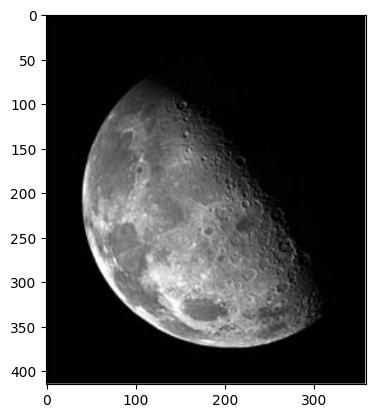

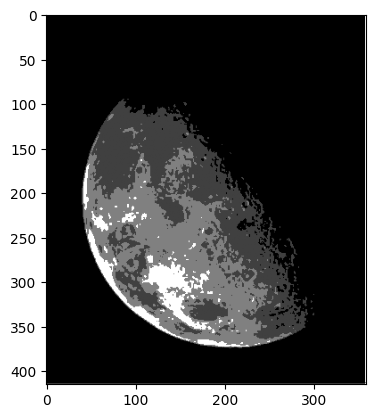

a media dos pixels sem normalização = 0.13159378460918886


In [ ]:
img_lua = np.array(Image.open("/content/image_processing_tools/images/spatial/moon.jpg")).astype(int)

# somar canais
img_lua = img_lua[:,:,0] + img_lua[:,:,1] + img_lua[:,:,2]

#normalizar
img_lua = normalizar(img_lua)/255
# img_lua = img_lua/255

#mostrar lua
plt.imshow(img_lua, cmap= 'gray')
plt.show()

# discretizando os valores do pixels de acordo com o pedido na questao
img_lua = np.where(img_lua < .25, 0, img_lua)
img_lua = np.where((img_lua >= .25) & (img_lua < .5),  .25, img_lua)
img_lua = np.where((img_lua >= .5) & (img_lua < .75),  .5, img_lua)
img_lua = np.where(img_lua >= .75,  1, img_lua)

# mostrar lua discretizada
plt.imshow(img_lua, cmap= 'gray')
plt.show()

# print(img_lua)
media_pixels = np.mean(img_lua)
print(f"a media dos pixels sem normalização = {media_pixels}")

In [ ]:
# esta funcao aplica RLE em uma sequencia (list)
def compress_sequence(sequence):
  position = 0
  seq_compactada = []
  while position < len(sequence):
    counter = 0
    cur_pos = position
    cur_val = sequence[cur_pos]
    while cur_pos < len(sequence) and sequence[cur_pos] == cur_val  :
      cur_pos += 1
      counter += 1
    seq_compactada.append((counter,cur_val))
    position += counter
  return seq_compactada


In [ ]:
# aqui nos aplicamos o RLE em cada linha da imagem
# depois verificamos o comprimento da sequencia compactada (em numero de tuplas)
# depois somamos tudo
img_comprimida_size = np.sum([ len(compress_sequence(line)) for line in img_lua])

# numero de pixels da imagem original
img_lua_size = img_lua.shape[0]*img_lua.shape[1]

print(img_lua_size/img_comprimida_size)

19.862018397546993


Aplique a standadizacao nos pixeis da imagem resultante da soma dos canais da imagem original da Lua. Depois aplique uma normalização para que todos os pixels estejam entre 0 e 1. Determine a média dos pixels da imagem resultante.

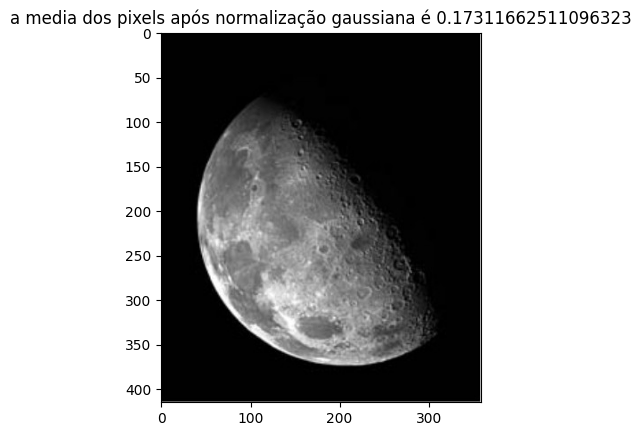

In [ ]:
img_lua = np.array(Image.open("/content/image_processing_tools/images/spatial/moon.jpg")).astype(int)

# somar canais
img_lua = img_lua[:,:,0] + img_lua[:,:,1] + img_lua[:,:,2]

img_lua_standardizada = (img_lua - img_lua.mean())/img_lua.std()
img_lua_standardizada = (img_lua_standardizada - img_lua_standardizada.min())/(img_lua_standardizada.max() - img_lua_standardizada.min())

media_pixels = img_lua_standardizada.mean()
plt.title(f"a media dos pixels após normalização gaussiana é {media_pixels}")
plt.imshow(img_lua_standardizada, cmap ='gray')
plt.show()